In [1]:
%load_ext autoreload
%autoreload 2

In [50]:
import pandas as pd
import os
import glob
import sys
import matplotlib.pyplot as plt

In [3]:
sys.path.append("../../code")
import loaders.cityprotect as cp
import loaders.losaltos as lla
import analysis.populations as pop
import analysis.grouping as gp
import plotting.lare_matplot as viz

In [4]:
la_dir = "../../data/clean_data/"
la_df =  lla.load_ripa_data(glob.glob(os.path.join(la_dir, "LAPD_RIPA_*.csv")), dir=la_dir, verbose=True)

Records: 2969 Stop IDs: [55, 4841]  Date Range: [2021-02-01 10:39:00, 2022-06-26 15:06:00]
Records: 1660 Stop IDs: [3106, 5742]  Date Range: [2022-01-02 19:11:00, 2022-12-31 19:18:00]
Records: 880 Stop IDs: [5743, 6616]  Date Range: [2023-01-01 22:30:00, 2023-06-30 22:42:00]


In [5]:
la_df["call_for_service"].value_counts()

call_for_service
False    4634
True       79
Name: count, dtype: int64

In [6]:
la_df["simple_race"] = la_df["race"].apply(lambda x: gp.simplify_race(x))

In [32]:
la_df[la_df["call_for_service"] == True]["simple_race"].value_counts(normalize=True).rename("Call")

simple_race
White       0.468354
Hispanic    0.177215
Asian       0.177215
Black       0.151899
Other       0.025316
Name: Call, dtype: float64

In [33]:
la_df[la_df["call_for_service"] == False]["simple_race"].value_counts(normalize=True).rename("No Call")

simple_race
White       0.389728
Asian       0.299957
Hispanic    0.249245
Black       0.040354
Other       0.020716
Name: No Call, dtype: float64

In [21]:
lapop = pop.get_population(city="Los Altos")

In [26]:
pd.DataFrame({"pop": lapop, "simple_race": lapop.index.map(gp.simplify_race)})

,pop,simple_race
White,17735.000000,White
Hispanic/Latino(a),1357.000000,Hispanic
Asian,6963.059055,Asian
Middle Eastern or South Asian,2622.940945,Asian
Black/African American,145.000000,Black
Pacific Islander,0.000000,Other
Native American,24.000000,Other
Multiple,1567.000000,Other
Other,100.000000,Other


In [42]:
simple_pop_frac = pd.DataFrame({"Population": lapop, "simple_race": lapop.index.map(gp.simplify_race)}).groupby("simple_race").sum() / lapop.sum()

In [43]:
simple_pop_frac["Call"] = la_df[la_df["call_for_service"] == True]["simple_race"].value_counts(normalize=True).rename("Call")

In [44]:
simple_pop_frac["No Call"] = la_df[la_df["call_for_service"] == False]["simple_race"].value_counts(normalize=True).rename("No Call")

In [45]:
simple_pop_frac

,Population,Call,No Call
simple_race,,,
Asian,0.314151,0.177215,0.299957
Black,0.004752,0.151899,0.040354
Hispanic,0.044471,0.177215,0.249245
Other,0.055417,0.025316,0.020716
White,0.581209,0.468354,0.389728


C:\Users\brian\AppData\Local\Temp\ipykernel_6828\810101923.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{100*x:.0f}%' for x in ax.get_yticks()]);


Text(0.5, 1.0, 'Fraction of Stops Originating from Calls to Police')

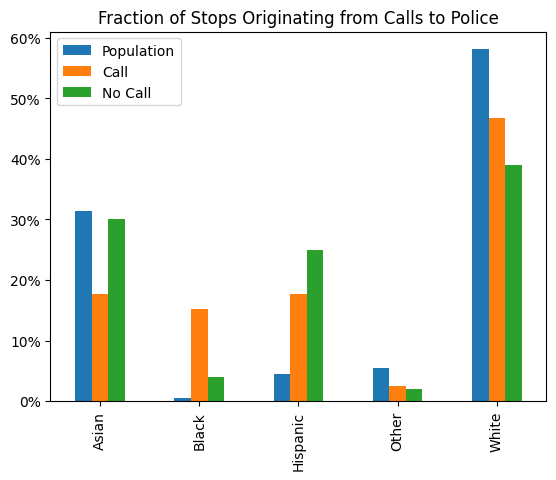

In [56]:
fig, ax = plt.subplots(1,1)
simple_pop_frac.plot.bar(ax=ax)
ax.set_yticklabels([f'{100*x:.0f}%' for x in ax.get_yticks()]);
ax.set_xlabel("")
ax.set_title("Fraction of Stops Originating from Calls to Police")

C:\Users\brian\AppData\Local\Temp\ipykernel_6828\774142675.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{100*x:.0f}%' for x in ax.get_xticks()]);


Text(0.5, 1.0, 'Fraction of Stops Originating from Calls to Police')

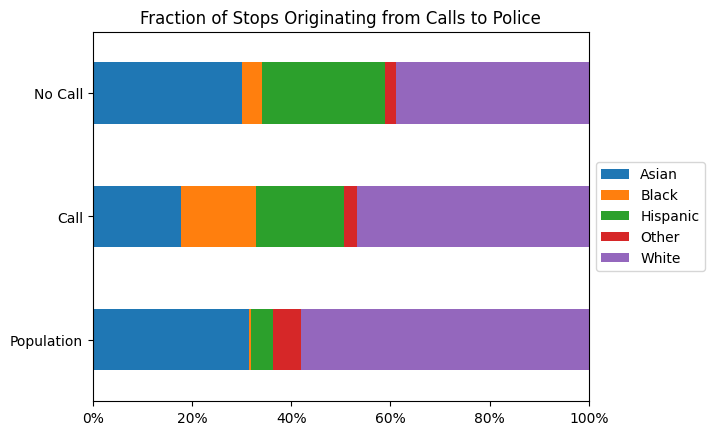

In [65]:
fig, ax = plt.subplots(1,1)
simple_pop_frac.T.plot.barh(stacked=True, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels([f'{100*x:.0f}%' for x in ax.get_xticks()]);
ax.set_xlim([0,1])
ax.set_title("Fraction of Stops Originating from Calls to Police")

In [58]:
simple_pop_frac

,Population,Call,No Call
simple_race,,,
Asian,0.314151,0.177215,0.299957
Black,0.004752,0.151899,0.040354
Hispanic,0.044471,0.177215,0.249245
Other,0.055417,0.025316,0.020716
White,0.581209,0.468354,0.389728


In [69]:
simple_pop_frac["Call"]/simple_pop_frac["No Call"]

simple_race
Asian       0.590802
Black       3.764164
Hispanic    0.711009
Other       1.222046
White       1.201747
dtype: float64